# Exploring Dandiset 001195: Separable Dorsal Raphe Dopamine Projections Mediate the Facets of Loneliness-like State

**Note:** This notebook was AI-generated and has not been fully verified. Please exercise caution when interpreting the code or results.

## Overview of the Dandiset

This Dandiset, [DANDI:001195 (version 0.250408.1733)](https://dandiarchive.org/dandiset/001195/0.250408.1733), contains supporting data for the publication "Separable Dorsal Raphe Dopamine Projections Mediate the Facets of Loneliness-like State" by Lee, Matthews, et al. (bioRxiv 2025).

The dataset includes:
- In vivo calcium imaging data with supporting behavioral videos
- Ex vivo patch-clamp electrophysiology recordings

The study investigates the role of dorsal raphe dopamine projections in social behavior and loneliness-like states in mice.

This notebook will cover:
- How to list and connect to the Dandiset using the DANDI API.
- How to access metadata for the Dandiset.
- How to list assets (files) within the Dandiset.
- How to load and inspect an NWB (Neurodata Without Borders) file containing intracellular electrophysiology data.
- How to visualize a segment of a current-clamp recording from an NWB file.

## Required Packages

This notebook requires the following Python packages. It is assumed they are already installed:
- `dandi`
- `pynwb`
- `h5py`
- `remfile`
- `matplotlib`
- `numpy`
- `seaborn`
- `itertools`

## Loading the Dandiset using the DANDI API

In [1]:
from itertools import islice
from dandi.dandiapi import DandiAPIClient

# Connect to DANDI archive
client = DandiAPIClient()
dandiset_id = "001195"
dandiset_version = "0.250408.1733"
dandiset = client.get_dandiset(dandiset_id, dandiset_version)

# Print basic information about the Dandiset
metadata = dandiset.get_raw_metadata()
print(f"Dandiset name: {metadata['name']}")
print(f"Dandiset URL: {metadata['url']}")
print(f"Dandiset description: {metadata.get('description', 'N/A')[:200]}...") # Truncate for brevity

# List some assets in the Dandiset
assets = dandiset.get_assets()
print("\nFirst 5 assets:")
for asset in islice(assets, 5):
    print(f"- {asset.path} (ID: {asset.identifier})") # Use asset.identifier

Dandiset name: Separable Dorsal Raphe Dopamine Projections Mediate the Facets of Loneliness-like State
Dandiset URL: https://dandiarchive.org/dandiset/001195/0.250408.1733
Dandiset description: Supporting data for the publication "Separable Dorsal Raphe Dopamine Projections Mediate the Facets of Loneliness-like State" by Christopher R. Lee, Gillian A. Matthews, Mackenzie E. Lemieux, Elizabet...

First 5 assets:
- sub-23/sub-23_ses-20150324T134114_slice-slice-1_cell-C1_icephys.nwb (ID: a243dde4-c270-42a9-8550-025f5ffcd5a7)
- sub-23/sub-23_ses-20150324T161217_slice-slice-2_cell-B3_icephys.nwb (ID: 8c1155c8-4531-4625-9515-e399f1b5f7bc)
- sub-235/sub-235_ses-20200921T142415_slice-slice-1_cell-C3_icephys.nwb (ID: da3bb7c6-cd57-4c1a-92aa-2be38419088c)
- sub-23/sub-23_ses-20150324T154615_slice-slice-2_cell-B2_icephys.nwb (ID: 85bf2dfb-0e2f-442d-b11c-e0d38bcc8783)
- sub-23/sub-23_ses-20150324T152016_slice-slice-2_cell-B1_icephys.nwb (ID: 1bbc22a8-059d-4cd2-80c6-e1c20969ab19)


## Loading an NWB File and Inspecting Metadata

We will now load one of the NWB files from the Dandiset. Let's choose the first NWB file listed in the previous step.
For this example, we will use the asset `sub-23/sub-23_ses-20150324T134114_slice-slice-1_cell-C1_icephys.nwb`.
The asset ID for this file (obtained from the previous cell or Dandiset asset listing) is `a243dde4-c270-42a9-8550-025f5ffcd5a7`.

In [2]:
import pynwb
import h5py
import remfile
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Apply seaborn theme for plots
sns.set_theme()

# --- Information for the selected NWB file ---
asset_id = "a243dde4-c270-42a9-8550-025f5ffcd5a7" # From Dandiset assets exploration
asset_path = "sub-23/sub-23_ses-20150324T134114_slice-slice-1_cell-C1_icephys.nwb"
nwb_url = f"https://api.dandiarchive.org/api/assets/{asset_id}/download/"

print(f"Selected NWB file path: {asset_path}")
print(f"NWB file URL: {nwb_url}")

# Load the NWB file
# This uses the remfile library to stream the remote HDF5 file
remote_f = remfile.File(nwb_url)
h5_f = h5py.File(remote_f, mode='r')
io = pynwb.NWBHDF5IO(file=h5_f, mode='r', load_namespaces=True)
nwbfile = io.read()

print(f"\nSuccessfully loaded NWB file: {nwbfile.identifier}")
print(f"Session description: {nwbfile.session_description}")
print(f"Session start time: {nwbfile.session_start_time}")
print(f"Experimenter: {nwbfile.experimenter}")

Selected NWB file path: sub-23/sub-23_ses-20150324T134114_slice-slice-1_cell-C1_icephys.nwb
NWB file URL: https://api.dandiarchive.org/api/assets/a243dde4-c270-42a9-8550-025f5ffcd5a7/download/



Successfully loaded NWB file: a18b081c-3b63-45df-b702-fc3640aef3de
Session description: episodic stimulation
Session start time: 2015-03-24 13:41:14-07:00
Experimenter: ('Matthews, Gillian',)


### Neurosift Link

You can explore this NWB file interactively on Neurosift using the following link:

[Explore on Neurosift](https://neurosift.app/nwb?url=https://api.dandiarchive.org/api/assets/a243dde4-c270-42a9-8550-025f5ffcd5a7/download/&dandisetId=001195&dandisetVersion=draft)

(Note: The Neurosift link uses `dandisetVersion=draft` which generally works for published versions too, but ideally would match the specific version `0.250408.1733` if supported by Neurosift's URL structure for versioned Dandisets.)

### Contents of the NWB File

Let's list the acquisition data series available in this NWB file. These typically contain the recorded electrophysiological traces.

In [3]:
print("Available acquisition series:")
if nwbfile.acquisition:
    for series_name, series_obj in nwbfile.acquisition.items():
        print(f"- {series_name} (type: {type(series_obj).__name__}, unit: {series_obj.unit if hasattr(series_obj, 'unit') else 'N/A'})")
else:
    print("No acquisition data found.")

print("\nAvailable stimulus series:")
if nwbfile.stimulus:
    for series_name, series_obj in nwbfile.stimulus.items():
        print(f"- {series_name} (type: {type(series_obj).__name__}, unit: {series_obj.unit if hasattr(series_obj, 'unit') else 'N/A'})")
else:
    print("No stimulus data found.")

Available acquisition series:
- current_clamp-response-01-ch-0 (type: CurrentClampSeries, unit: volts)
- current_clamp-response-01-ch-1 (type: CurrentClampSeries, unit: volts)
- current_clamp-response-02-ch-0 (type: CurrentClampSeries, unit: volts)
- current_clamp-response-02-ch-1 (type: CurrentClampSeries, unit: volts)
- current_clamp-response-03-ch-0 (type: CurrentClampSeries, unit: volts)
- current_clamp-response-03-ch-1 (type: CurrentClampSeries, unit: volts)
- current_clamp-response-04-ch-0 (type: CurrentClampSeries, unit: volts)
- current_clamp-response-04-ch-1 (type: CurrentClampSeries, unit: volts)
- current_clamp-response-05-ch-0 (type: CurrentClampSeries, unit: volts)
- current_clamp-response-05-ch-1 (type: CurrentClampSeries, unit: volts)
- current_clamp-response-06-ch-0 (type: CurrentClampSeries, unit: volts)
- current_clamp-response-06-ch-1 (type: CurrentClampSeries, unit: volts)
- current_clamp-response-07-ch-0 (type: CurrentClampSeries, unit: volts)
- current_clamp-respo

We can also look at the subject information:

In [4]:
if nwbfile.subject:
    print("Subject Information:")
    print(f"  Subject ID: {nwbfile.subject.subject_id}")
    print(f"  Age: {nwbfile.subject.age}")
    print(f"  Sex: {nwbfile.subject.sex}")
    print(f"  Species: {nwbfile.subject.species}")
    print(f"  Genotype: {nwbfile.subject.genotype}")
    print(f"  Description: {nwbfile.subject.description}")
else:
    print("No subject information found.")

Subject Information:
  Subject ID: 23
  Age: P302D
  Sex: F
  Species: Mus musculus
  Genotype: heterozygote
  Description: AAV5-DIO-ChR2-eYFP into DRN


## Visualizing Data from the NWB File

Let's visualize a segment of a Current Clamp Series. We'll use `current_clamp-response-01-ch-0` which was identified in the acquisition series list.

Plotting first 1000 points of current_clamp-response-01-ch-0
Data unit: volts
Conversion factor: 3.051757880712104e-05


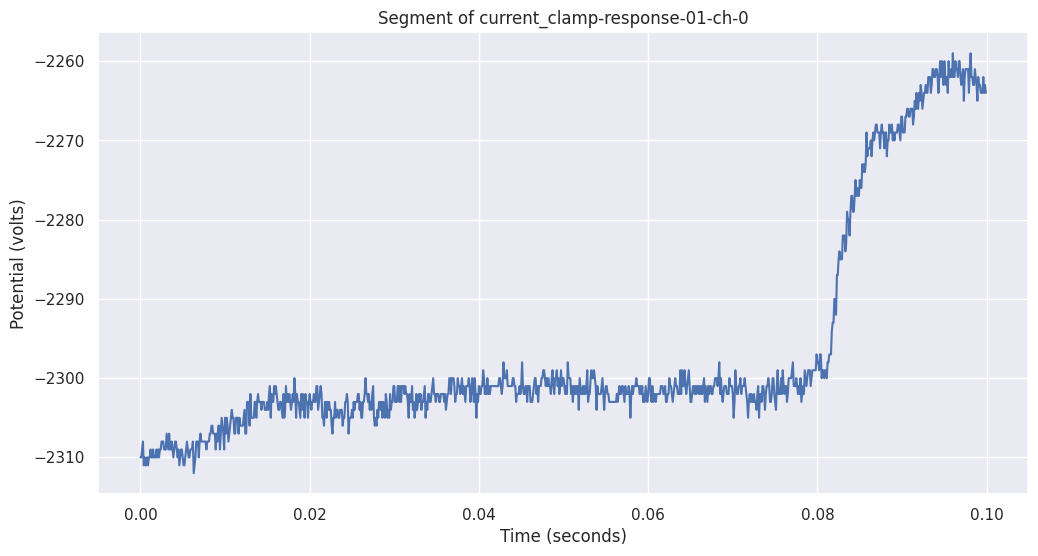

In [5]:
series_to_plot_name = "current_clamp-response-01-ch-0"

if nwbfile.acquisition and series_to_plot_name in nwbfile.acquisition:
    current_clamp_series = nwbfile.acquisition[series_to_plot_name]

    # Load a segment of data (e.g., first 1000 data points)
    num_points_to_plot = 1000
    data_segment = current_clamp_series.data[:num_points_to_plot]
    
    # Time vector
    sampling_rate = current_clamp_series.rate
    time_segment = np.arange(len(data_segment)) / sampling_rate + (current_clamp_series.starting_time or 0)

    print(f"Plotting first {num_points_to_plot} points of {series_to_plot_name}")
    print(f"Data unit: {current_clamp_series.unit}")
    print(f"Conversion factor: {current_clamp_series.conversion}")
    
    plt.figure(figsize=(12, 6))
    plt.plot(time_segment, data_segment)
    plt.xlabel(f"Time ({current_clamp_series.starting_time_unit})")
    plt.ylabel(f"Potential ({current_clamp_series.unit})")
    plt.title(f"Segment of {series_to_plot_name}")
    plt.grid(True)
    plt.show()
else:
    print(f"Series '{series_to_plot_name}' not found in acquisition data.")

The plot above shows a segment of a current-clamp recording. The y-axis is in Volts.
Note the scale of the y-axis; intracellular recordings are typically in the millivolt (mV) range. The data is presented as stored and converted using the metadata within the NWB file.

## Summary and Future Directions

This notebook demonstrated how to:
- Connect to a Dandiset on the DANDI Archive.
- Retrieve basic metadata and list assets.
- Load an NWB file containing intracellular electrophysiology data.
- Inspect metadata and contents of the NWB file, including available acquisition series.
- Visualize a segment of a current-clamp recording.

**Possible Future Directions for Analysis:**
- **Explore other NWB files:** This Dandiset contains many NWB files. Similar methods can be applied to inspect and analyze data from other cells or experimental conditions.
- **Detailed analysis of stimulus-response properties:** For current-clamp data, one could analyze firing patterns, spike shapes, and input resistance in response to different current injections. For voltage-clamp data, one could analyze ionic currents.
- **Comparison across conditions:** If applicable (e.g., comparing data from socially isolated vs. control animals, though this specific NWB file is ex-vivo), one could compare electrophysiological properties across different experimental groups defined in the Dandiset.
- **Relate to calcium imaging data:** The Dandiset also includes calcium imaging. Advanced analyses could aim to correlate findings from electrophysiology with neural activity patterns observed through imaging, if such connections are relevant and possible with the provided data structure.

Researchers are encouraged to consult the original publication associated with this Dandiset for detailed experimental context and findings.

Remember to close the NWB file IO object if you are done with it in a script context, though in a notebook, it's often left open for interactive exploration.
For completeness in a script, you would do:
```python
# io.close()
# h5_f.close() # remfile handles remote closing, but good practice for local files
```
However, we will leave it open here.

In [6]:
# Clean up for notebook execution if necessary, but often not needed for the final cell.
# io.close() # To prevent resource warnings if re-run multiple times in some environments.
# h5_f.close()
print("Notebook exploration finished.")

Notebook exploration finished.
